In [ ]:
import pandas as pd

In [ ]:
vendas_aracaju_df = pd.read_excel("Aracaju.xlsx")
vendas_fortaleza_df = pd.read_excel("Fortaleza.xlsx")
vendas_natal_df = pd.read_excel("Natal.xlsx")
vendas_recife_df = pd.read_excel("Recife.xlsx")
vendas_salvador_df = pd.read_excel("Salvador.xlsx")

In [ ]:
# Juntar todos os arquivos
vendas_df = pd.concat([vendas_aracaju_df, vendas_fortaleza_df, vendas_natal_df, vendas_recife_df, vendas_salvador_df])
display(vendas_df)

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8
...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1


In [ ]:
vendas_df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
36,Aracaju,2018-01-01,37.99,1523,8
110,Fortaleza,2019-03-02,51.98,983,6
35,Salvador,2019-01-01,241.45,1037,1
141,Fortaleza,2019-03-02,182.75,983,8
114,Fortaleza,2019-03-02,16.82,983,4
136,Salvador,2019-03-02,13.81,1036,1
122,Aracaju,2018-01-01,38.49,1522,4
5,Fortaleza,2019-01-01,37.30,1002,5
131,Natal,2019-01-02,63.48,1037,3
50,Fortaleza,2019-01-01,33.69,1005,3


In [ ]:
# Verificndo o tipo de dado de cada coluna
# vendas_df.dtypes()
vendas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 239
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Cidade  894 non-null    object        
 1   Data    894 non-null    datetime64[ns]
 2   Vendas  894 non-null    float64       
 3   LojaID  894 non-null    int64         
 4   Qtde    894 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 41.9+ KB


In [ ]:
# Alterando tipos de dados
vendas_df["LodaID"] = vendas_df["LojaID"].astype("object")
vendas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 239
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Cidade  894 non-null    object        
 1   Data    894 non-null    datetime64[ns]
 2   Vendas  894 non-null    float64       
 3   LojaID  894 non-null    int64         
 4   Qtde    894 non-null    int64         
 5   LodaID  894 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 48.9+ KB


In [ ]:
# consultar valores nulos
vendas_df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
LodaID    0
dtype: int64

In [ ]:
# Substituir valores nulos pel média
vendas_df["Vendas"].fillna(vendas_df["Vendas"].mean(),inplace=True)
vendas_df.isnull().sum()
# Substituir nulos por zero
# vendas_df["Vendas"].fillna(0, inplace=True)

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
LodaID    0
dtype: int64

In [ ]:
# Apagando valores nulos
vendas_df.dropna(inplace=True)

In [ ]:
# Apagando linhas com valores nulos de coluna específica
vendas_df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
# Apagando linhas com valores nulos de toda base de dados
vendas_df.dropna(how="all", inplace=True)

In [ ]:
# Crindo a coluna de receita
vendas_df["Receita"] = vendas_df["Vendas"].mul(vendas_df["Qtde"])
# Caso fosse necessário saber os valores de Qtde
# vendas_df["Qtde"] = vendas_df["Receita"] / vendas_df["Vendas"]

In [ ]:
vendas_df.head()

,Cidade,Data,Vendas,LojaID,Qtde,LodaID,Receita
0,Aracaju,2018-01-01,142.00,1520,1,1520,142.00
1,Aracaju,2018-01-01,14.21,1522,6,1522,85.26
2,Aracaju,2018-01-01,71.55,1520,1,1520,71.55
3,Aracaju,2018-01-01,3.01,1521,7,1521,21.07
4,Aracaju,2018-01-01,24.51,1522,8,1522,196.08


In [ ]:
# maior receita
vendas_df["Receita"].max()

3544.0

In [ ]:
# menor receita
vendas_df["Receita"].min()

3.34

In [ ]:
# nlargest
vendas_df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,LodaID,Receita
7,Natal,2019-03-18,886.0,853,4,853,3544.0
51,Natal,2018-01-21,859.0,852,4,852,3436.0
55,Natal,2019-01-08,859.0,854,4,854,3436.0


In [ ]:
# nsmallest
vendas_df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,LodaID,Receita
118,Aracaju,2018-01-01,3.34,1522,1,1522,3.34
65,Recife,2019-01-01,4.01,981,1,981,4.01
92,Natal,2019-01-02,4.57,1035,1,1035,4.57


In [ ]:
# Agrupando por cidades, somando valores
vendas_df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
# Ordenando os dados
vendas_df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,LodaID,Receita
7,Natal,2019-03-18,886.0,853,4,853,3544.0
55,Natal,2019-01-08,859.0,854,4,854,3436.0
51,Natal,2018-01-21,859.0,852,4,852,3436.0
30,Natal,2018-10-02,856.0,853,4,853,3424.0
41,Natal,2018-05-20,835.0,852,4,852,3340.0
38,Natal,2018-02-25,828.0,852,4,852,3312.0
10,Natal,2018-10-27,828.0,852,4,852,3312.0
69,Natal,2019-03-24,817.0,852,4,852,3268.0
62,Natal,2018-02-10,793.0,854,4,854,3172.0
52,Natal,2018-04-27,778.0,854,4,854,3112.0


In [ ]:
# TRABALHANDO COM DATAS
# Transformando a coluna de dat em tipo inteiro
vendas_df["Data"] = vendas_df["Data"].astype("int64")
vendas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 239
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cidade   894 non-null    object 
 1   Data     894 non-null    int64  
 2   Vendas   894 non-null    float64
 3   LojaID   894 non-null    int64  
 4   Qtde     894 non-null    int64  
 5   LodaID   894 non-null    object 
 6   Receita  894 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 55.9+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Transformando a coluna data em datetime
vendas_df["Data"] = pd.to_datetime(vendas_df["Data"])
vendas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 239
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Cidade   894 non-null    object        
 1   Data     894 non-null    datetime64[ns]
 2   Vendas   894 non-null    float64       
 3   LojaID   894 non-null    int64         
 4   Qtde     894 non-null    int64         
 5   LodaID   894 non-null    object        
 6   Receita  894 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 55.9+ KB


In [ ]:
# Agrupando dados por ano
vendas_df.groupby(vendas_df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
# Criado uma nova coluna com o ano
vendas_df["Ano_Venda"] = vendas_df["Data"].dt.year
vendas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 239
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Cidade     894 non-null    object        
 1   Data       894 non-null    datetime64[ns]
 2   Vendas     894 non-null    float64       
 3   LojaID     894 non-null    int64         
 4   Qtde       894 non-null    int64         
 5   LodaID     894 non-null    object        
 6   Receita    894 non-null    float64       
 7   Ano_Venda  894 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 62.9+ KB


In [ ]:
# Extraindo o mês e o dia
vendas_df["Mes_Venda"], vendas_df["Dia_Venda"] = (vendas_df["Data"].dt.month, vendas_df["Data"].dt.day) 
vendas_df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,LodaID,Receita,Ano_Venda,Mes_Venda,Dia_Venda
239,Natal,2019-01-03,161.41,1037,3,1037,484.23,2019,1,3
127,Fortaleza,2019-03-02,39.56,982,8,982,316.48,2019,3,2
76,Fortaleza,2019-01-01,38.61,1004,4,1004,154.44,2019,1,1
86,Salvador,2019-01-01,156.47,1037,3,1037,469.41,2019,1,1
133,Salvador,2019-03-02,153.71,1035,1,1035,153.71,2019,3,2


In [ ]:
# Retornando a data mais antiga
vendas_df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
# Calculando a diferença de dias
vendas_df["Diferenca_dias"] = vendas_df["Data"] - vendas_df["Data"].min()

In [ ]:
vendas_df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,LodaID,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias
58,Recife,2019-01-01,8.02,983,2,983,16.04,2019,1,1,365 days
95,Salvador,2019-01-01,5.13,1035,1,1035,5.13,2019,1,1,365 days
108,Natal,2019-01-02,11.72,1037,1,1037,11.72,2019,1,2,366 days
39,Recife,2019-01-01,143.58,981,3,981,430.74,2019,1,1,365 days
211,Salvador,2019-01-02,141.05,1035,3,1035,423.15,2019,1,2,366 days


In [ ]:
# Criando coluna trimestre
vendas_df["Trimestre_venda"] = vendas_df["Data"].dt.quarter
vendas_df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,LodaID,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias,Trimestre_venda
223,Natal,2019-01-02,40.51,1037,2,1037,81.02,2019,1,2,366 days,1
14,Aracaju,2018-01-01,148.21,1521,3,1521,444.63,2018,1,1,0 days,1
7,Salvador,2019-02-11,6.13,1034,2,1034,12.26,2019,2,11,406 days,1
173,Salvador,2019-01-02,31.77,1034,2,1034,63.54,2019,1,2,366 days,1
222,Natal,2019-01-02,43.96,1037,1,1037,43.96,2019,1,2,366 days,1


In [ ]:
# Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = vendas_df.loc[(vendas_df["Data"].dt.year == 2019) & (vendas_df["Data"].dt.month == 3)]
vendas_marco_19.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde,LodaID,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias,Trimestre_venda
114,Salvador,2019-03-02,25.52,1034,1,1034,25.52,2019,3,2,425 days,1
138,Recife,2019-03-02,150.38,983,6,983,902.28,2019,3,2,425 days,1
66,Natal,2019-03-24,559.00,853,2,853,1118.00,2019,3,24,447 days,1
113,Recife,2019-03-02,38.63,980,2,980,77.26,2019,3,2,425 days,1
119,Salvador,2019-03-02,136.37,1034,2,1034,272.74,2019,3,2,425 days,1
123,Recife,2019-03-02,20.22,981,6,981,121.32,2019,3,2,425 days,1
138,Fortaleza,2019-03-02,150.38,983,6,983,902.28,2019,3,2,425 days,1
118,Salvador,2019-03-02,92.21,1035,2,1035,184.42,2019,3,2,425 days,1
128,Recife,2019-03-02,38.70,982,4,982,154.80,2019,3,2,425 days,1
132,Recife,2019-03-02,17.49,983,5,983,87.45,2019,3,2,425 days,1


## Visualização de dados

In [ ]:
vendas_df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

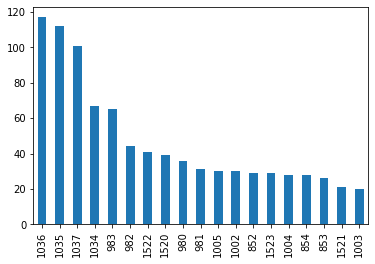

In [ ]:
# Gráfico de barras
vendas_df["LojaID"].value_counts(ascending=False).plot.bar()

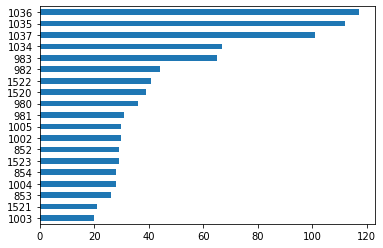

In [ ]:
# Gráfico de barras horizontais
vendas_df["LojaID"].value_counts(ascending=True).plot.barh();

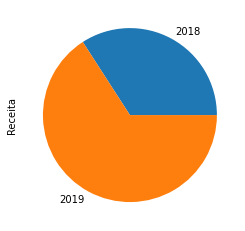

In [ ]:
# Grpafico de Pizza
vendas_df.groupby(vendas_df["Data"].dt.year)["Receita"].sum().plot.pie()

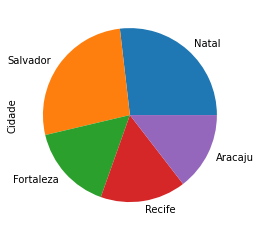

In [ ]:
# Total vendas por cidade
vendas_df["Cidade"].value_counts().plot.pie()

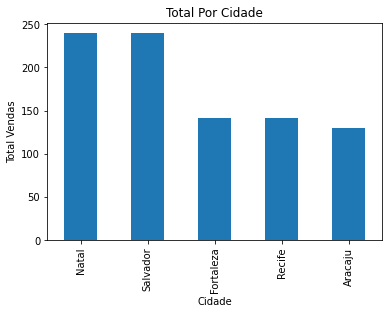

In [ ]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt

vendas_df["Cidade"].value_counts().plot.bar(title="Total Por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

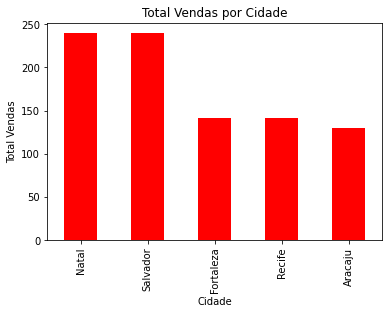

In [ ]:
# Alterando a cor
vendas_df["Cidade"].value_counts().plot.bar(title="Total Vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
# Alterando o estilo
plt.style.use("ggplot")

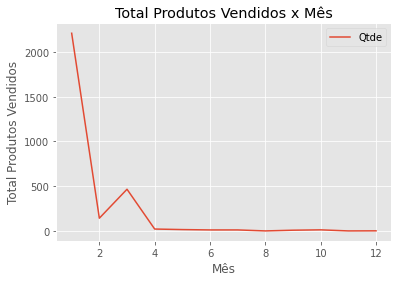

In [ ]:
vendas_df.groupby(vendas_df["Mes_Venda"])["Qtde"].sum().plot(title = "Total Produtos Vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [ ]:
vendas_df.groupby(vendas_df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
# Total (apenas as vendas de 2019)
vendas_df_2019 = vendas_df[vendas_df["Ano_Venda"] == 2019]

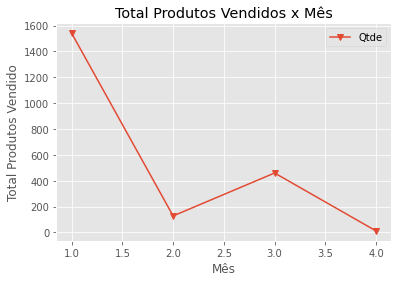

In [ ]:
#total produtos vendidos por mês
vendas_df_2019.groupby(vendas_df_2019["Mes_Venda"])["Qtde"].sum().plot(title = "Total Produtos Vendidos x Mês", marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendido")
plt.legend();

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

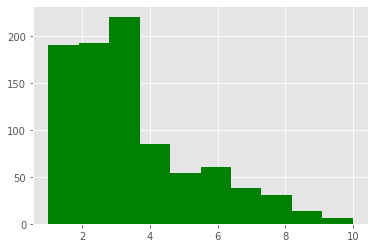

In [ ]:
# Histograma
plt.hist(vendas_df["Qtde"], color = "g")

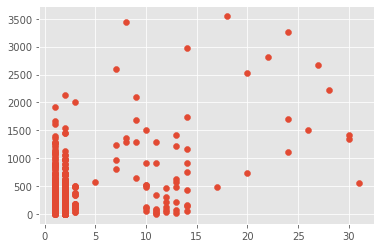

In [ ]:
plt.scatter(x=vendas_df_2019["Dia_Venda"], y = vendas_df_2019["Receita"]);

In [ ]:
# Salvando em PNG
vendas_df_2019.groupby(vendas_df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos X Mês")
plt.xlbel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend()
plt.savefig("grafico Qtde X Mês.png")
